In [1]:
#Data cleaning and regime aware EDA

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns',None)


In [6]:
df=pd.read_csv("../data/processed/merged_rossman.csv")
df['Date']=pd.to_datetime(df['Date'])
print(df.shape)
df.head()

(1017209, 18)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,2,2013-01-01,0,0,0,0,a,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,3,2013-01-02,5530,668,1,0,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,4,2013-01-03,4327,578,1,0,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,5,2013-01-04,4486,619,1,0,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,6,2013-01-05,4997,635,1,0,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


In [7]:
#Remove closed days
#In Rossman, 0 means the store is closed
df=df[df['Open']==1].copy()
print("After removing closed days:",df.shape)

After removing closed days: (844392, 18)


In [13]:
#Handling missing values
df["CompetitionDistance"] = df["CompetitionDistance"].fillna(df["CompetitionDistance"].median())

df["Promo2SinceWeek"] = df["Promo2SinceWeek"].fillna(0)
df["Promo2SinceYear"] = df["Promo2SinceYear"].fillna(0)

# Competition open info
df["CompetitionOpenSinceMonth"] = df["CompetitionOpenSinceMonth"].fillna(0)
df["CompetitionOpenSinceYear"] = df["CompetitionOpenSinceYear"].fillna(0)

# Promo interval (categorical)
df["PromoInterval"] = df["PromoInterval"].fillna("None")


df.isnull().sum()

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [18]:
#Remove zero sales (its just noise)
df=df[df['Sales']>0].copy()
print("After removing zero sales:",df.shape)

After removing zero sales: (844338, 18)


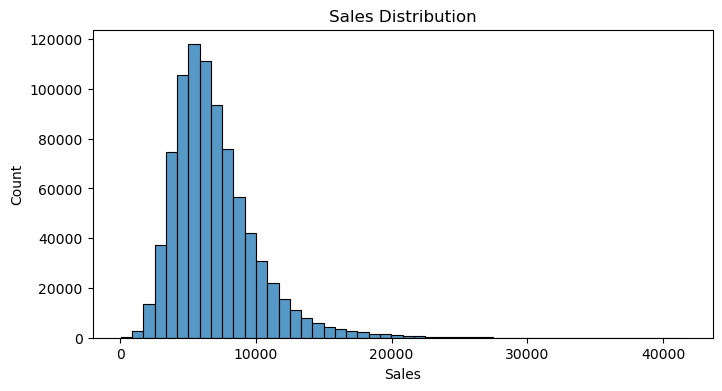

In [19]:
#Basic distribution
plt.figure(figsize=(8,4))
sns.histplot(df["Sales"], bins=50)
plt.title("Sales Distribution")
plt.show()


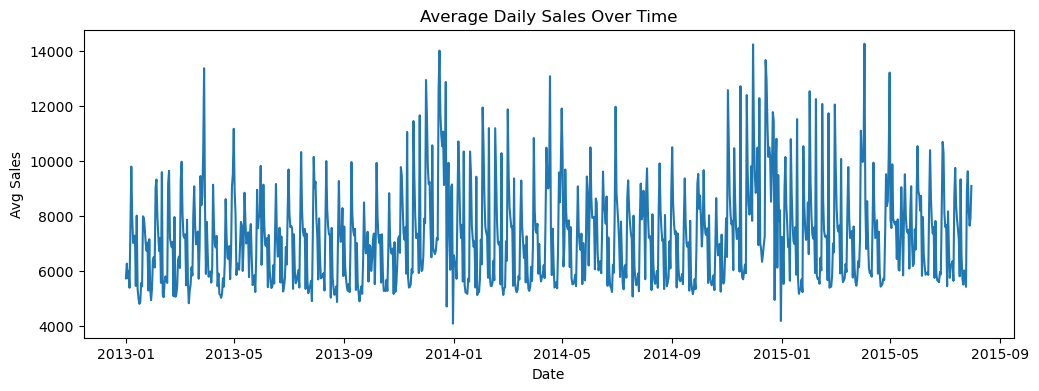

In [21]:
#Time trend
daily_sales = df.groupby("Date")["Sales"].mean()

plt.figure(figsize=(12,4))
plt.plot(daily_sales.index, daily_sales.values)
plt.title("Average Daily Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Avg Sales")
plt.show()


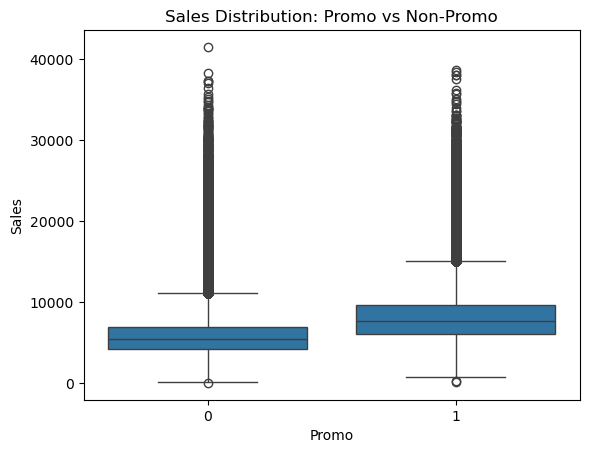

In [22]:
#Promo vs sales
sns.boxplot(x="Promo", y="Sales", data=df)
plt.title("Sales Distribution: Promo vs Non-Promo")
plt.show()


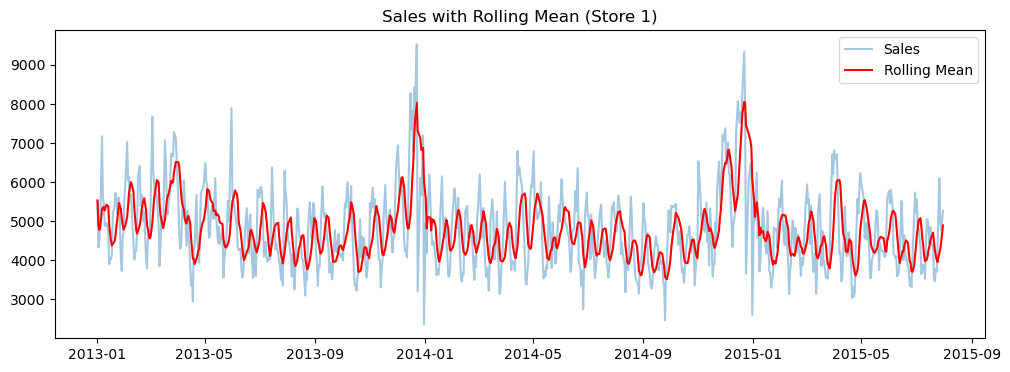

In [24]:
#Demand regime preview
df = df.sort_values(["Store", "Date"])

df["sales_rolling_7"] = df.groupby("Store")["Sales"].transform(lambda x: x.rolling(7, min_periods=1).mean())

sample = df[df["Store"] == 1]

plt.figure(figsize=(12,4))
plt.plot(sample["Date"], sample["Sales"], label="Sales", alpha=0.4)
plt.plot(sample["Date"], sample["sales_rolling_7"], label="Rolling Mean", color="red")
plt.legend()
plt.title("Sales with Rolling Mean (Store 1)")
plt.show()



In [25]:
df.to_csv("../data/processed/cleaned_rossmann.csv", index=False)